In [16]:
# python libraries
import collections
from scipy import stats
import time

# numpy libraries
import numpy as np

# matplotlib libraries
import matplotlib.pyplot as plt

# libraries specific to project
import util
from util import *
#from cluster import *

In [2]:
######################################################################
# classes
######################################################################

class Point(object) :
    
    def __init__(self, name, label, attrs) :
        """
        A data point.
        
        Attributes
        --------------------
            name  -- string, name
            label -- string, label
            attrs -- string, features
        """
        
        self.name = name
        self.label = label
        self.attrs = attrs
    
    
    #============================================================
    # utilities
    #============================================================
    
    def distance(self, other) :
        """
        Return Euclidean distance of this point with other point.
        
        Parameters
        --------------------
            other -- Point, point to which we are measuring distance
        
        Returns
        --------------------
            dist  -- float, Euclidean distance
        """
        # Euclidean distance metric
        return np.linalg.norm(self.attrs-other.attrs)
    
    def __str__(self) :
        """
        Return string representation.
        """
        return "%s : (%s, %s)" % (self.name, str(self.attrs), self.label)


In [3]:
class Cluster(object) :
    
    def __init__(self, points) :
        """
        A cluster (set of points).
        
        Attributes
        --------------------
            points -- list of Points, cluster elements
        """        
        self.points = points
    
    
    def __str__(self) :
        """
        Return string representation.
        """
        s = ""
        for point in self.points :
            s += str(point)
        return s
        
    #============================================================
    # utilities
    #============================================================
    
    def purity(self) :
        """
        Compute cluster purity.
        
        Returns
        --------------------
            n           -- int, number of points in this cluster
            num_correct -- int, number of points in this cluster
                                with label equal to most common label in cluster
        """        
        labels = []
        for p in self.points :
            labels.append(p.label)
        
        cluster_label, count = stats.mode(labels)
        return len(labels), np.float64(count)
    
    
    def centroid(self) :
        """
        Compute centroid of this cluster.
        
        Returns
        --------------------
            centroid -- Point, centroid of cluster
        """
        
        # part 2b: implement
        # set the centroid label to any value (e.g. the most common label in this cluster)
        labels = []
        mean = np.zeros([1, self.points[0].attrs.shape[0]])
        for p in self.points:
            labels.append(p.label)
            mean += p.attrs
            
        mean = mean/len(labels)
        cluster_label, count = stats.mode(labels)
        centroid = Point('centroid', cluster_label, mean)
        
        return centroid
    
    
    def medoid(self) :
        """
        Compute medoid of this cluster, that is, the point in this cluster
        that is closest to all other points in this cluster.
        
        Returns
        --------------------
            medoid -- Point, medoid of this cluster
        """
        
        # part 2b: implement
        medoid = None
        min_dist = float('inf')
        for p in self.points:
            temp_dist = 0
            #sum distances between p and all other points 
            for j in self.points:
                temp_dist += (p.distance(j))**2
            #if sum of distances is smaller than current distances, then update medoid
            if temp_dist < min_dist:
                min_dist = temp_dist
                medoid = p
        
        return medoid
    
    
    def equivalent(self, other) :
        """
        Determine whether this cluster is equivalent to other cluster.
        Two clusters are equivalent if they contain the same set of points
        (not the same actual Point objects but the same geometric locations).
        
        Parameters
        --------------------
            other -- Cluster, cluster to which we are comparing this cluster
        
        Returns
        --------------------
            flag  -- bool, True if both clusters are equivalent or False otherwise
        """
        
        if len(self.points) != len(other.points) :
            return False
        
        matched = []
        for point1 in self.points :
            for point2 in other.points :
                if point1.distance(point2) == 0 and point2 not in matched :
                    matched.append(point2)
        return len(matched) == len(self.points)



In [4]:
class ClusterSet(object):

    def __init__(self) :
        """
        A cluster set (set of clusters).
        
        Parameters
        --------------------
            members -- list of Clusters, clusters that make up this set
        """
        self.members = []
    
    
    #============================================================
    # utilities
    #============================================================    
    
    def centroids(self) :
        """
        Return centroids of each cluster in this cluster set.
        
        Returns
        --------------------
            centroids -- list of Points, centroids of each cluster in this cluster set
        """
        
        # part 2b: implement
        centroids = []
        for cluster in self.members:
            centroids.append(cluster.centroid())
        return centroids
    
    
    
    def medoids(self) :
        """
        Return medoids of each cluster in this cluster set.
        
        Returns
        --------------------
            medoids -- list of Points, medoids of each cluster in this cluster set
        """
        
        medoids = []
        for i in self.members:
            medoids.append(i.medoid())
        return medoids
    
    
    def score(self) :
        """
        Compute average purity across clusters in this cluster set.
        
        Returns
        --------------------
            score -- float, average purity
        """
        
        total_correct = 0
        total = 0
        for c in self.members :
            n, n_correct = c.purity()
            total += n
            total_correct += n_correct
        return total_correct / float(total)
    
    
    def equivalent(self, other) :
        """ 
        Determine whether this cluster set is equivalent to other cluster set.
        Two cluster sets are equivalent if they contain the same set of clusters
        (as computed by Cluster.equivalent(...)).
        
        Parameters
        --------------------
            other -- ClusterSet, cluster set to which we are comparing this cluster set
        
        Returns
        --------------------
            flag  -- bool, True if both cluster sets are equivalent or False otherwise
        """
        
        if len(self.members) != len(other.members):
            return False
        
        matched = []
        for cluster1 in self.members :
            for cluster2 in other.members :
                if cluster1.equivalent(cluster2) and cluster2 not in matched:
                    matched.append(cluster2)
        return len(matched) == len(self.members)
    
    
    #============================================================
    # manipulation
    #============================================================

    def add(self, cluster):
        """
        Add cluster to this cluster set (only if it does not already exist).
        
        If the cluster is already in this cluster set, raise a ValueError.
        
        Parameters
        --------------------
            cluster -- Cluster, cluster to add
        """
        
        if cluster in self.members :
            raise ValueError
        
        self.members.append(cluster)


In [ ]:
#Testing the above classes by creating points and adding them to clusters and computing the centroids

def produce_point():
    points = []
    for i in range(5):
        points.append(Point('test', 1, [0,i]))
    return points
points = produce_point()
cluster = Cluster(points)
cluster_set = ClusterSet()
cluster_set.add(cluster)
cluster_set.centroids()

In [5]:
######################################################################
# helper functions
######################################################################

def build_face_image_points(X, y) :
    """
    Translate images to (labeled) points.
    
    Parameters
    --------------------
        X     -- numpy array of shape (n,d), features (each row is one image)
        y     -- numpy array of shape (n,), targets
    
    Returns
    --------------------
        point -- list of Points, dataset (one point for each image)
    """
    
    n,d = X.shape
    
    images = collections.defaultdict(list) # key = class, val = list of images with this class
    for i in range(n) :
        images[y[i]].append(X[i,:])
    
    points = []
    for face in images :
        count = 0
        for im in images[face] :
            points.append(Point(str(face) + '_' + str(count), face, im))
            count += 1

    return points


def plot_clusters(clusters, title, average, ext) :
    """
    Plot clusters along with average points of each cluster.

    Parameters
    --------------------
        clusters -- ClusterSet, clusters to plot
        title    -- string, plot title
        average  -- method of ClusterSet
                    determines how to calculate average of points in cluster
                    allowable: ClusterSet.centroids, ClusterSet.medoids
    """
    
    plt.figure()
    np.random.seed(20)
    label = 0
    colors = {}
    centroids = average(clusters)
    for c in centroids :
        coord = c.attrs
        plt.plot(coord[0],coord[1], 'ok', markersize=12)
    for cluster in clusters.members :
        label += 1
        colors[label] = np.random.rand(3,)
        for point in cluster.points :
            coord = point.attrs
            plt.plot(coord[0], coord[1], 'o', color=colors[label])
    plt.title(title)
    #plt.show()
    saveme =  ext + 'p4_2f_1.jpg'
    plt.savefig(saveme)

def generate_points_2d(N, seed=1234) :
    """
    Generate toy dataset of 3 clusters each with N points.
    
    Parameters
    --------------------
        N      -- int, number of points to generate per cluster
        seed   -- random seed
    
    Returns
    --------------------
        points -- list of Points, dataset
    """
    np.random.seed(seed)
    
    mu = [[0,0.5], [1,1], [2,0.5]]
    sigma = [[0.1,0.1], [0.25,0.25], [0.15,0.15]]
    
    label = 0
    points = []
    for m,s in zip(mu, sigma) :
        label += 1
        for i in range(N) :
            x = util.random_sample_2d(m, s)
            points.append(Point(str(label)+'_'+str(i), label, x))
    
    return points



In [6]:
######################################################################
# k-means and k-medoids
######################################################################

def random_init(points, k) :
    """
    Randomly select k unique elements from points to be initial cluster centers.
    
    Parameters
    --------------------
        points         -- list of Points, dataset
        k              -- int, number of clusters
    
    Returns
    --------------------
        initial_points -- list of k Points, initial cluster centers
    """
    # part 2c: 
    initial_points = np.random.choice(points, k, replace=False)
    
    return initial_points


def cheat_init(points) :
    """
    Initialize clusters by cheating!
    
    Details
    - Let k be number of unique labels in dataset.
    - Group points into k clusters based on label (i.e. class) information.
    - Return medoid of each cluster as initial centers.
    
    Parameters
    --------------------
        points         -- list of Points, dataset
    
    Returns
    --------------------
        initial_points -- list of k Points, initial cluster centers
    """
    
    # part 2f: implement
    initial_points = []
    labels = []
    for point in points:
        labels.append(point.label)
    unique_labels = set(labels)
    k = len(unique_labels)
    k_clusters = ClusterSet()
    for i in unique_labels:
        k_clusters.add(Cluster([point for point in points if point.label == i]))
    
    initial_points = k_clusters.medoids()
    return initial_points


def kMeans(points, k, init='random', plot=False) :
    """
    Cluster points into k clusters using variations of k-means algorithm.
    
    Parameters
    --------------------
        points  -- list of Points, dataset
        k       -- int, number of clusters
        average -- method of ClusterSet
                   determines how to calculate average of points in cluster
                   allowable: ClusterSet.centroids, ClusterSet.medoids
        init    -- string, method of initialization
                   allowable: 
                       'cheat'  -- use cheat_init to initialize clusters
                       'random' -- use random_init to initialize clusters
        plot    -- bool, True to plot clusters with corresponding averages
                         for each iteration of algorithm
    
    Returns
    --------------------
        k_clusters -- ClusterSet, k clusters
    """
    
    # part 2c: implement kmeans 
    
    assignments = [0]*len(points)
    k_clusters = ClusterSet()
    if init == 'random':
        centroids = random_init(points,k)
    else:
        centroids = cheat_init(points)
    
    while True:
        new_clusters = ClusterSet()
        
        #assign points to clusters
        for j in range(len(points)):
            min_dist = float('inf')
            #print('j is: ' + str(j))
            for i in range(k):
                #print('i is: ' + str(i))
                temp_dist = points[j].distance(centroids[i])
                if temp_dist < min_dist:
                    assignments[j] = i
                    min_dist = temp_dist
    
        #form new clusters based on assignments 
        for i in range(k):
            new_clusters.add(Cluster([points[n] for n in range(len(points)) if assignments[n] == i]))
        
        if plot == True:
            plot_clusters(new_clusters, 'Iteration ' , ClusterSet.centroids, str('mean'))
        
        #update centroids
        centroids = new_clusters.centroids()
        
        #if clusters have not been changed, then break loop and return clusters
        if k_clusters.equivalent(new_clusters):
            break
        else:
            k_clusters = new_clusters
        
    
    return k_clusters


def kMedoids(points, k, init='random', plot=False) :
    """
    Cluster points in k clusters using k-medoids clustering.
    See kMeans(...).
    """
    # part 2e: implement kMedoids
    assignments = [0]*len(points)
    k_clusters = ClusterSet()
    if init == 'random':
        medoids = random_init(points,k)
    else:
        medoids = cheat_init(points)
    
    while True:
        new_clusters = ClusterSet()
        
        #
        for j in range(len(points)):
            min_dist = float('inf')
            for i in range(k):
                temp_dist = points[j].distance(medoids[i])
                if temp_dist < min_dist:
                    assignments[j] = i
                    min_dist = temp_dist
    
        #form new clusters based on assignments 
        for i in range(k):
            new_clusters.add(Cluster([points[n] for n in range(len(points)) if assignments[n] == i ]))
        
        if plot == True:
            plot_clusters(new_clusters, 'Iteration' + str(p), ClusterSet.medoids, str('medoid'))
        #update centroids
        medoids = new_clusters.medoids()
        
        #if clusters have not been changed, then break loop and return clusters
        if k_clusters.equivalent(new_clusters):
            break
        else:
            k_clusters = new_clusters
        
    return k_clusters



Total dataset size:
	num_samples: 1867
	num_features: 1850
	num_classes: 19


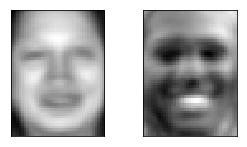

In [17]:
######################################################################
# main
######################################################################

def main() :
    
    # part 2d-2f: cluster toy dataset
    np.random.seed(1234)
    points = generate_points_2d(20)
    
    #calculating cluster scores for kmeans and plot cluster iterations
    mean_score = [0]*10
    for i in range(10):
        curr = kMeans(points, 3, init='cheat', plot=True)
        mean_score[i] = curr.score()
    
    print('mean for kmeans: ', sum(mean_score)/len(score))
    print('max for kmeans: ', max(mean_score))
    print('min for kmeans: ', min(mean_score))
    
    #calculating cluster scores for kmedoids and plot cluster iterations
    medoid_score = [0]*10
    for i in range(10):
        curr = kMedoids(points, 3, init='cheat', plot=True)
        medoid_score[i] = curr.score()
    

    print('mean for kmedoids: ', sum(medoid_score)/len(score))
    print('max for kmedoids: ', max(medoid_score))
    print('min for kmedoids: ', min(medoid_score))
    
    
    #part 3a: Apply k-means andk-medoids to faces dataset with k=4 and initializing the centroids randomly. 
    X,y = get_lfw_data()
    X1, y1 = util.limit_pics(X, y, [4, 6, 13, 16], 40)
    faces = build_face_image_points(X1, y1)
    
    run_time_kmeans = [0]*10
    run_time_kmedoids
    for i in range(10): 
        #measure time and scores for kmeans 
        start= time.time()
        curr = kMeans(faces, 4, init='random') 
        end = time.time()
        run_time_kmeans[i] = end - start
        means_score[i] = curr.score()
        
        #measure time and scores for kmedoids 
        start = time.time()
        curr2 = kMedoids(points, 2, init='random')
        end = time.time()
        run_time_kmedoids[i] = end - start
        median_score[i] = curr2.score()
   
    #print results from kmeans 
    print('mean for kmeans: ', sum(means_score)/10)
    print('max for kmeans: ', max(means_score))
    print('min for kmeans: ', min(means_score))
    print('avg run time for kmeans: ', sum(run_time_kmeans)/10)
    
    #print results from kmedoids 
    print('mean for kmedoids: ', sum(median_score)/10)
    print('max for kmedoids: ', max(median_score))
    print('min for kmedoids: ', min(median_score))
    print('avg run time for kmedoids: ', sum(run_time_kmedoids)/10)

    
    # part 3b: explore effect of lower-dimensional representations on clustering performance
    X2, y2 = util.limit_pics(X, y, [6, 16], 40)
    U, mu = PCA(X)
    means_score = [0]*21
    median_score = [0]*21
    i = 0 
    for l in range(1,43,2):  
        Z_1, U_1 = apply_PCA_from_Eig(X2, U, 50, mu)
        faces = build_face_image_points(Z_1, y2)
        curr = kMeans(faces, 2, init='cheat')        
        curr2 = kMedoids(faces, 2, init='cheat')
        means_score[i] = curr.score()
        median_score[i] = curr2.score()
        i += 1
    
    plt.figure()
    plt.plot(list(range(1, 43, 2)), means_score)
    plt.plot(list(range(1,43,2)), median_score)
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Clustering Score')
    plt.savefig('p4_3b.jpg')
    plt.close()
    
    
    # part 3c: determine ``most discriminative'' and ``least discriminative'' pairs of images
    most_x, most_y = util.limit_pics(X, y, [6, 16], 40)
    least_x, least_y = util.limit_pics(X, y, [4, 5], 40)
    
    #calculate score for most discriminative face 
    Z_most, U_most = apply_PCA_from_Eig(most_x, U, 50, mu)
    faces_most = build_face_image_points(Z_most, most_y)
    curr = kMeans(faces_most, 2, init='cheat')        
    curr2 = kMedoids(faces_most, 2, init='cheat')
    mean_score = curr.score()
    median_score = curr2.score()
    
    
    #print results from kmeans and kedoids 
    print('kmeans score for most discriminative faces: ', mean_score)
    print('kmedoids score for most dscriminative faces: ', median_score)
    
    #calculate score for least discriminative face 
    Z_least, U_least = apply_PCA_from_Eig(least_x, U, 50, mu)
    faces_least = build_face_image_points(Z_least, least_y)
    curr = kMeans(faces_least, 2, init='cheat')        
    curr2 = kMedoids(faces_least, 2, init='cheat')
    mean_score = curr.score()
    median_score = curr2.score()
    
    #print results from kmeans and kedoids 
    print('kmeans score for least discriminative faces: ', mean_score)
    print('kmedoids score for leasat dscriminative faces: ', median_score)
    

if __name__ == "__main__" :
    main()
